In [1]:
import cons
import os
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from utilities.gen_master_data import gen_master_data
from utilities.time_data import time_data
from utilities.time_plot import time_plot

### Generate Master Dataset

In [3]:
gen_master_data(cons.data_dir, cons.master_data_fpath)

E:\GitHub\IrishClimateChange\data\dublin_airport.xlsx
E:\GitHub\IrishClimateChange\data\johnstone_castle.xlsx
E:\GitHub\IrishClimateChange\data\wexford_wildflower_reserve.xlsx
E:\GitHub\IrishClimateChange\data\casement.xlsx
E:\GitHub\IrishClimateChange\data\glasnevin.xlsx
E:\GitHub\IrishClimateChange\data\merrion_square.xlsx


0

### Aggregate Time-Series Data

In [4]:
# load master data
data = pd.read_feather(cons.master_data_fpath)

In [5]:
date_strftime_dict = {'year':'%Y', 'year-month':'%Y-%m', 'month':'%m'}
counties = ['dublin', 'wexford']
agg_dict = {'maxtp':'mean', 'mintp':'mean', 'wdsp':'mean', 'sun':'mean', 'evap':'mean', 'rain':'mean'}

In [6]:
# aggregate by year
year_strftime = date_strftime_dict['year']
time_span = ['2010', '2019']
# generate time data
year_data = time_data(data = data, agg_dict = agg_dict, time_span = time_span, counties = counties, strftime = year_strftime)

In [7]:
year_data.shape

(20, 9)

In [8]:
# aggregate by month
month_strftime = date_strftime_dict['month']
time_span = ['01', '12']
# generate time data
month_data = time_data(data = data, agg_dict = agg_dict, time_span = time_span, counties = counties, strftime = month_strftime)

In [9]:
month_data.shape

(24, 9)

In [10]:
# aggregate by year month
year_month_strftime = date_strftime_dict['year-month']
time_span = ['2010-01', '2019-12']
# generate time data
year_month_data = time_data(data = data, agg_dict = agg_dict, time_span = time_span, counties = counties, strftime = year_month_strftime)

In [11]:
year_month_data.shape

(240, 9)

### Time Series Plot

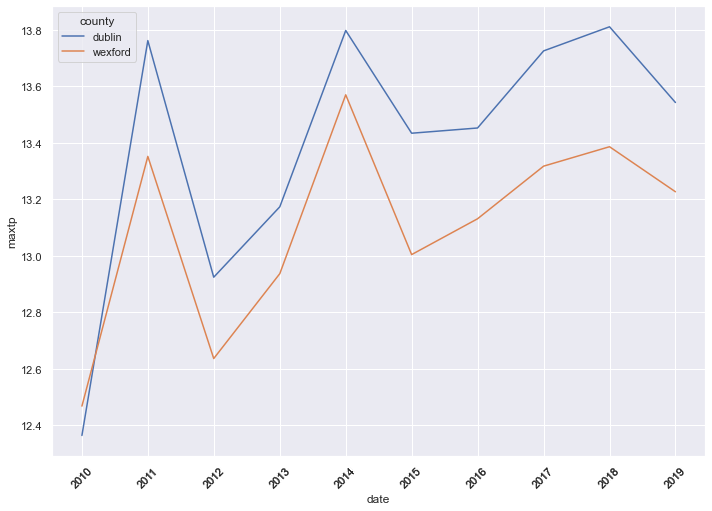

0

In [12]:
time_plot(year_data, x = 'date', y = 'maxtp', hue = 'county', strftime = year_strftime)

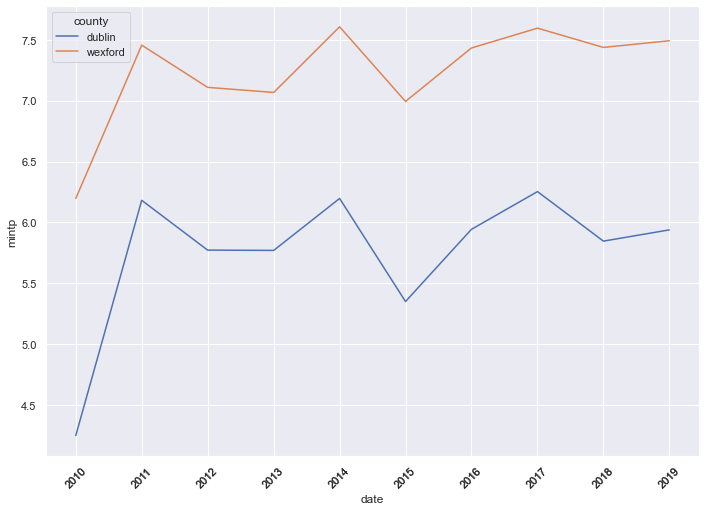

0

In [13]:
time_plot(year_data, x = 'date', y = 'mintp', hue = 'county', strftime = year_strftime)

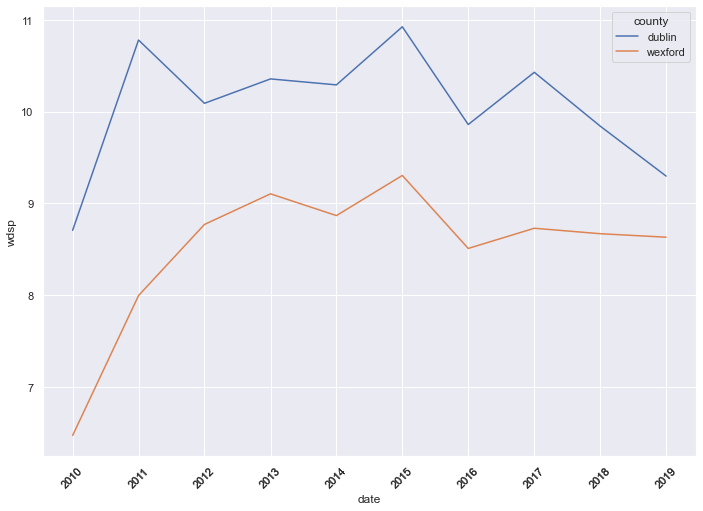

0

In [14]:
time_plot(year_data, x = 'date', y = 'wdsp', hue = 'county', strftime = year_strftime)

### GIS Map

In [12]:
counties_fpath = os.path.join(cons.census_2011_dir, 'Census2011_Admin_Counties_generalised20m\\Census2011_Admin_Counties_generalised20m.shp')
counties = gpd.read_file(counties_fpath)
counties.columns
counties['COUNTYNAME']
counties['geometry'].crs
geo = counties['geometry']

In [16]:
counties.head()

,NUTS1,NUTS1NAME,NUTS2,NUTS2NAME,NUTS3,NUTS3NAME,COUNTY,COUNTYNAME,GEOGID,MALE2011,...,TOTAL2011,PPOCC2011,UNOCC2011,VACANT2011,HS2011,PCVAC20111,LAND_AREA,TOTAL_AREA,CREATEDATE,geometry
0,IE0,Ireland,IE02,Southern and Eastern,IE023,Mid-West,20,Limerick City,C20,27947.0,...,57106.0,22589.0,4092.0,3273.0,26681.0,12.3,28.395591,30.774555,27-03-2012,"POLYGON ((155832.161 160028.794, 155915.130 15..."
1,IE0,Ireland,IE02,Southern and Eastern,IE023,Mid-West,21,Limerick County,C21,67868.0,...,134703.0,47555.0,7920.0,6841.0,55475.0,12.3,2654.656530,2725.346647,27-03-2012,"POLYGON ((167907.489 167002.317, 167957.746 16..."
2,IE0,Ireland,IE02,Southern and Eastern,IE023,Mid-West,22,North Tipperary,C22,35340.0,...,70322.0,25720.0,5070.0,4527.0,30790.0,14.7,1992.195059,2046.393944,27-03-2012,"POLYGON ((195253.807 212366.609, 195303.902 21..."
3,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),23,South Tipperary,C23,44244.0,...,88432.0,32770.0,5414.0,4817.0,38184.0,12.6,2255.694719,2258.870523,27-03-2012,"POLYGON ((225302.170 164757.562, 226080.110 16..."
4,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),24,Waterford City,C24,22921.0,...,46732.0,18344.0,3997.0,3300.0,22341.0,14.8,38.345886,41.639886,27-03-2012,"POLYGON ((260669.020 113118.989, 261041.606 11..."


<AxesSubplot: >

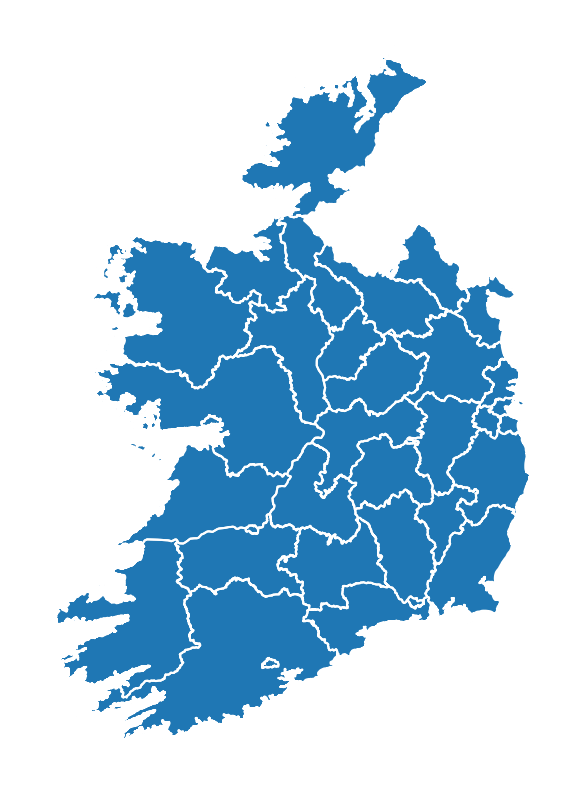

In [15]:
# create map of ireland
fig, ax1 = plt.subplots(figsize=(10, 10))
plt.axis('off')
counties['geometry'].plot(ax=ax1)
counties['geometry'].boundary.plot(ax = ax1, color = 'white')